<AxesSubplot:>

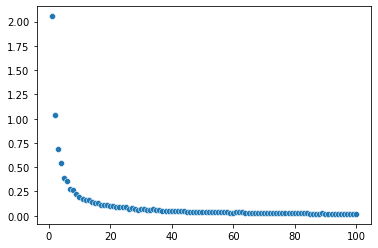

In [7]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

n_samples = 1000
variance = np.zeros(100)
for i in range(1, 101):
    samples = np.random.randint(1, 6, size=(n_samples, i))
    mean = np.mean(samples, axis=1)
    variance[i-1] = np.var(mean)

sns.scatterplot(np.arange(1, 101), variance)

0.0984776569278861
0.10032196403053613
0.091280253447712
0.10260303862590074
0.10270090167130083
0.09781500380729984
0.1018732426975158
0.096841193375315
0.09833567821778398
0.10231547353480622


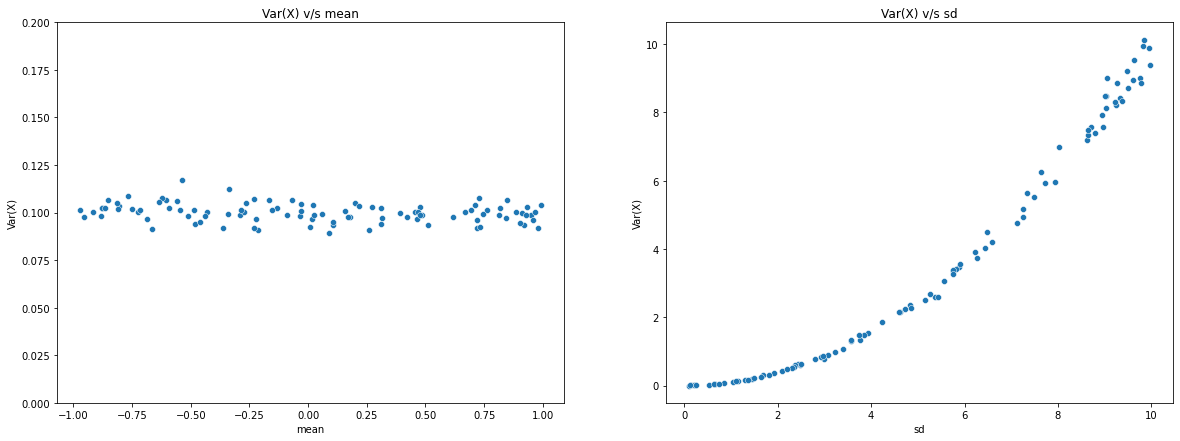

In [8]:
size = 100

variance_variable_mean = np.zeros(size+1)
variance_variable_sd = np.zeros(size+1)

var_mean_range = np.random.uniform(-1, 1, size+1)
var_sd_range = np.random.uniform(0, 10, size+1)

for id, i in enumerate(var_mean_range):
    # samples for variable mean and fixed sd
    samples_variable_mean = np.random.normal(loc=i, scale=1.0, size=(1000, 10))
    mean_variable_mean = np.mean(samples_variable_mean, axis=1)
    variance_variable_mean[id] = np.var(mean_variable_mean, )
    if id<10:
        print(variance_variable_mean[id])

for id, i in enumerate(var_sd_range):
    # samples for fixed mean and variable sd
    samples_variable_sd = np.random.normal(loc=0.0, scale=i, size=(1000, 10))
    mean_variable_sd = np.mean(samples_variable_sd, axis=1)
    variance_variable_sd[id] = np.var(mean_variable_sd)

fig, axs = plt.subplots(figsize=(20, 7), ncols=2)

sns.scatterplot(var_mean_range, variance_variable_mean, ax=axs[0])
axs[0].title.set_text('Var(X) v/s mean')
axs[0].set_xlabel('mean')
axs[0].set_ylabel('Var(X)')
axs[0].set_ylim((0.0, 0.2))

sns.scatterplot(var_sd_range, variance_variable_sd, ax=axs[1])
axs[1].title.set_text('Var(X) v/s sd')
axs[1].set_xlabel('sd')
axs[1].set_ylabel('Var(X)')

fig.show()

In [9]:
from scipy.stats import norm
from math import sqrt

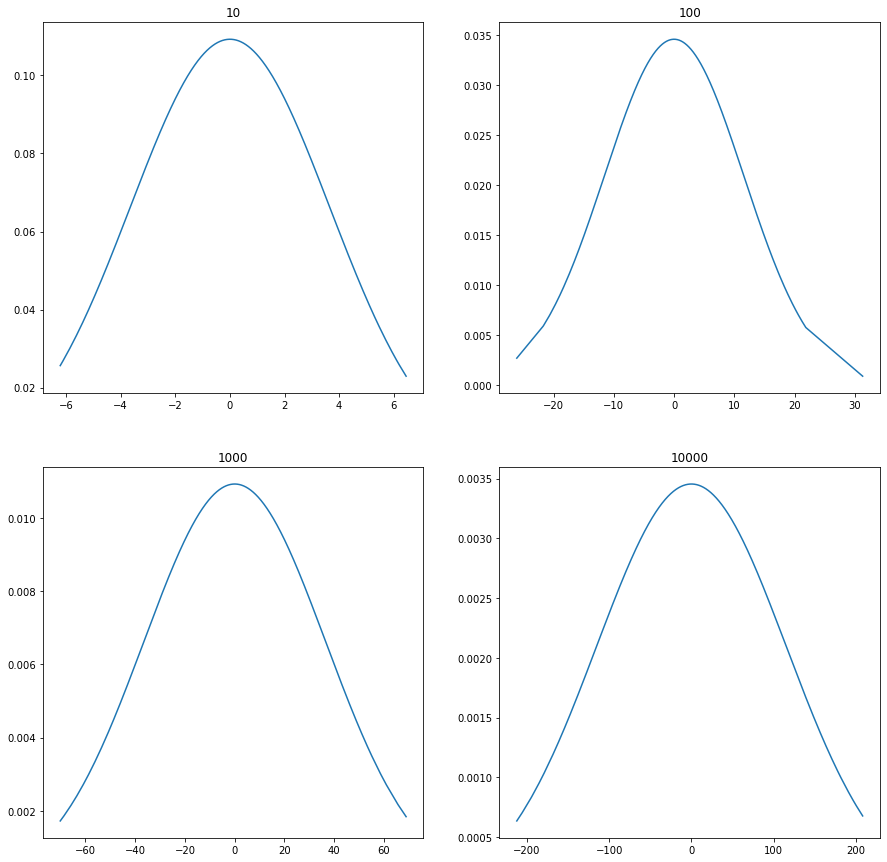

In [10]:
n = np.array([10, 100, 1000, 10000])
D_sum = np.empty(shape=(0, 0))

for size_idx in np.arange(n.shape[0]):
    D = np.random.uniform(-1, 1, size=(10000, n[size_idx]))
    if size_idx == 0:
        D_sum = np.sum(D, axis=1)
    else:
        D_sum = np.vstack([D_sum, np.sum(D, axis=1)])    

fig, axs = plt.subplots(figsize=(15, 15), nrows=2, ncols=2)
counter = 0
for i in np.arange(2):
    for j in np.arange(2):
        sns.lineplot(x=D_sum[counter,:], y=norm.pdf(D_sum[counter,:], (n[counter]*(-2+2)/2), (sqrt( ( (-2-2)**2)/12) )*sqrt(n[counter])), ax=axs[i, j])
        axs[i, j].set_title(f'{n[counter]}')
        counter += 1

# Chi Square test

### Using dice throw example (Discrete sample example)

#### We know that the population mean of dice throws will be:
### $\frac{\sum_{i=1}^6 i}{6}$
Hence, $\mu$ = 3.5

#### We also know that Standard Deviation will be:
### $\sqrt{\frac{\sum_{i=1}^6(x_i - \mu)}{6-1}}$
Hence, $\sigma$ = 1.707825127659933

In [11]:
pop_mean = 3.5
pop_std = 1.707825127659933
pop_var = pop_std**2

In [12]:
samples = np.random.randint(1, 6+1, size=(1000, 3))
print(samples[:10])
samples.shape

[[3 1 1]
 [2 3 5]
 [6 6 4]
 [3 1 3]
 [2 1 4]
 [2 1 4]
 [6 2 5]
 [2 5 4]
 [2 6 6]
 [4 1 5]]


(1000, 3)

In [13]:
sample_mean_dist = np.mean(samples, axis=1)
sample_var_dist = np.var(samples, axis=1)
sample_std_dist = sample_var_dist**0.5

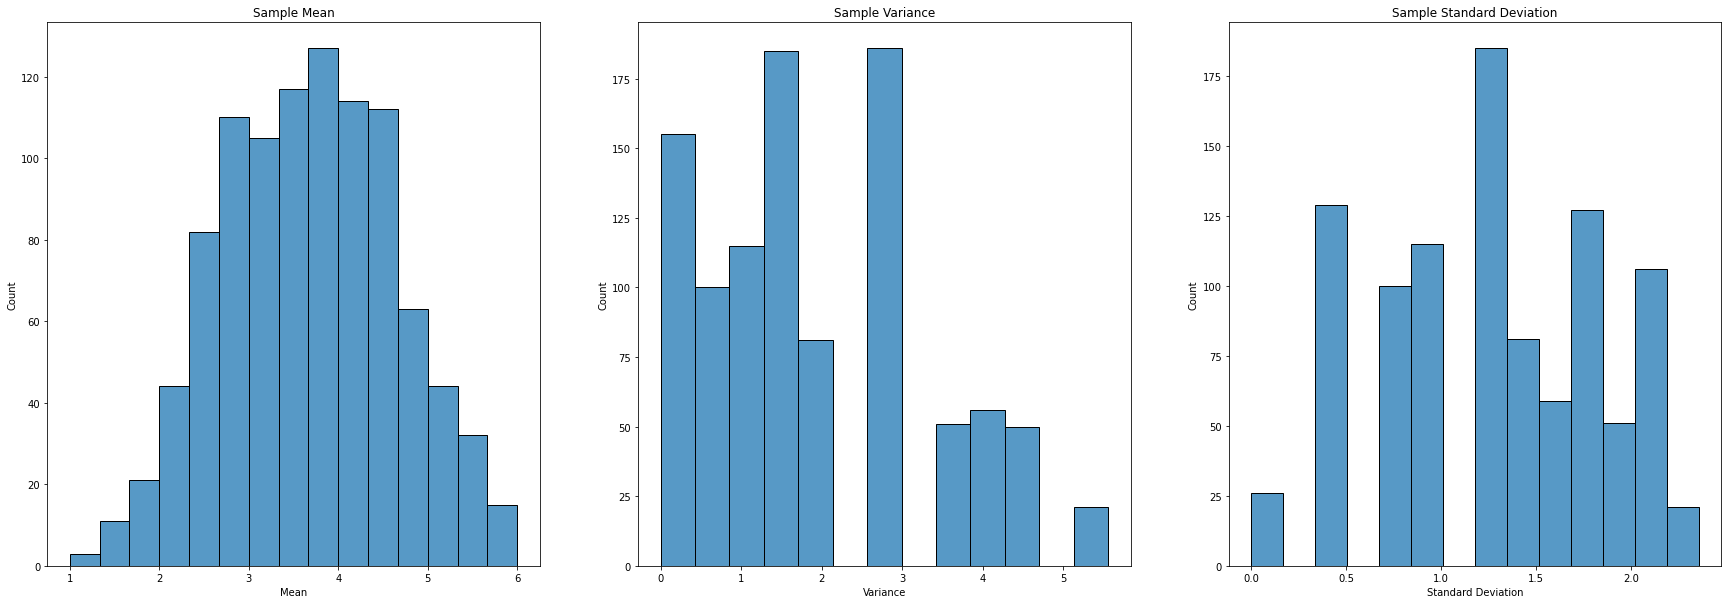

In [14]:
%matplotlib inline
fig, axs = plt.subplots(figsize=(30, 10), ncols=3)
sns.histplot(x=sample_mean_dist, ax=axs[0])
axs[0].set_title('Sample Mean')
axs[0].set_xlabel('Mean')
sns.histplot(x=sample_var_dist, ax=axs[1])
axs[1].set_title('Sample Variance')
axs[1].set_xlabel('Variance')
sns.histplot(x=sample_std_dist, ax=axs[2])
axs[2].set_title('Sample Standard Deviation')
axs[2].set_xlabel('Standard Deviation');

From *Central Limit Theorem*, we already knew that the sample means distribution will be a **Normal Distribution**
<br>Now, We have to gain insights about the ***sample variance distribution*** 
<br><br>
#### But, first lets see the whether the below given relation  holds or not: 
$E[S^2] = \sigma^2$

In [15]:
expected_sample_variance = np.mean(sample_var_dist)
expected_sample_variance

1.9393333333333336

In [16]:
pop_var

2.9166666666666665

Now, lets look at at the observations:
* $\sigma^2$ - $E[S^2]$ > 0
* $E[S^2]$ < $\sigma^2$

<br>But,we cannot say for sure since we tried this using only 1000 samples.<br>Let's, try this using $10^6$ samples.

In [17]:
large_samples = np.random.randint(1, 6+1, size=(10**6, 3))
print(large_samples[:10])
large_samples.shape 

[[1 3 1]
 [1 3 4]
 [3 4 4]
 [2 1 6]
 [3 3 6]
 [2 3 1]
 [6 2 2]
 [5 5 3]
 [2 5 2]
 [6 2 1]]


(1000000, 3)

In [18]:
large_sample_mean_dist = np.mean(large_samples, axis=1)
large_sample_var_dist = np.var(large_samples, axis=1)
large_sample_std_dist = large_sample_var_dist**0.5

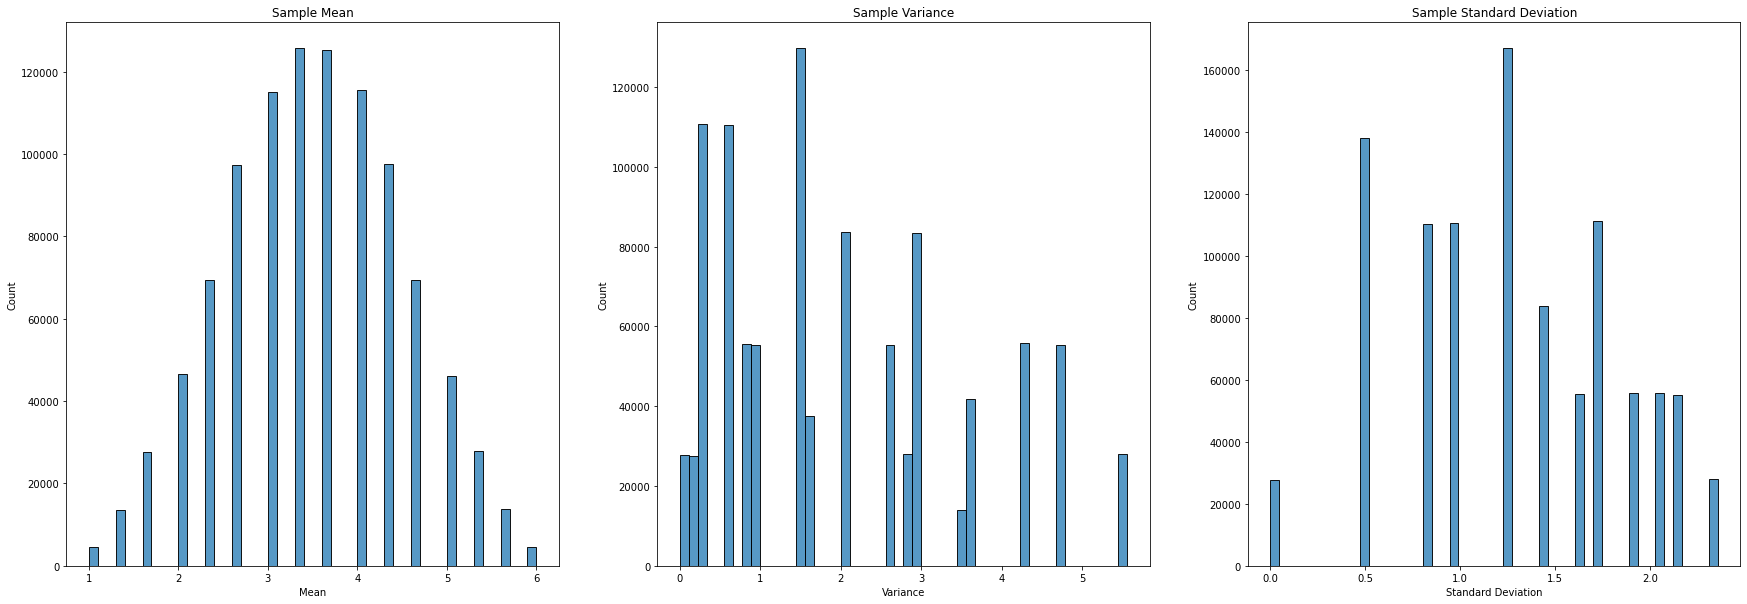

In [19]:
%matplotlib inline
fig, axs = plt.subplots(figsize=(30, 10), ncols=3)
sns.histplot(x=large_sample_mean_dist, ax=axs[0], bins=50)
axs[0].set_title('Sample Mean')
axs[0].set_xlabel('Mean')
sns.histplot(x=large_sample_var_dist, ax=axs[1], bins=50)
axs[1].set_title('Sample Variance')
axs[1].set_xlabel('Variance')
sns.histplot(x=large_sample_std_dist, ax=axs[2], bins=50)
axs[2].set_title('Sample Standard Deviation')
axs[2].set_xlabel('Standard Deviation');

In [20]:
expected_large_sample_var = np.mean(large_sample_var_dist)
expected_large_sample_var

1.9475279999999997

As we can see, there is very slight change in $E(S^2)$. Hence, our previous observations stands true.
* $\sigma^2$ - $E[S^2]$ > 0
* $E[S^2]$ < $\sigma^2$

### Random samples from standard normal dist. (Continous sample example) 

Since, it is a standard normal distribution, we know that:
<br>
$\mu=0$
<br>
$\sigma=1$

In [21]:
norm_samples = np.random.normal(size=(10**6, 3))
print(norm_samples[:10])
norm_samples.shape

[[-1.00486711  0.05670252 -0.54396403]
 [ 0.42809117 -0.04093007 -0.18205099]
 [-0.1824439  -1.80858319  0.01470057]
 [ 0.72624341  0.66905192 -0.2673392 ]
 [ 1.39819284 -0.86372877 -1.67598716]
 [-0.7411555  -0.63145453 -0.40341508]
 [-0.1742715   0.54009502  0.12081783]
 [-0.72749238 -0.95496415  0.77866365]
 [-1.71535985 -0.97160818  1.64123147]
 [-0.19262    -1.02389117  0.84946791]]


(1000000, 3)

In [22]:
norm_sample_mean_dist = np.mean(norm_samples, axis=1)
norm_sample_var_dist = np.var(norm_samples, axis=1)
norm_sample_std_dist = norm_sample_var_dist**0.5

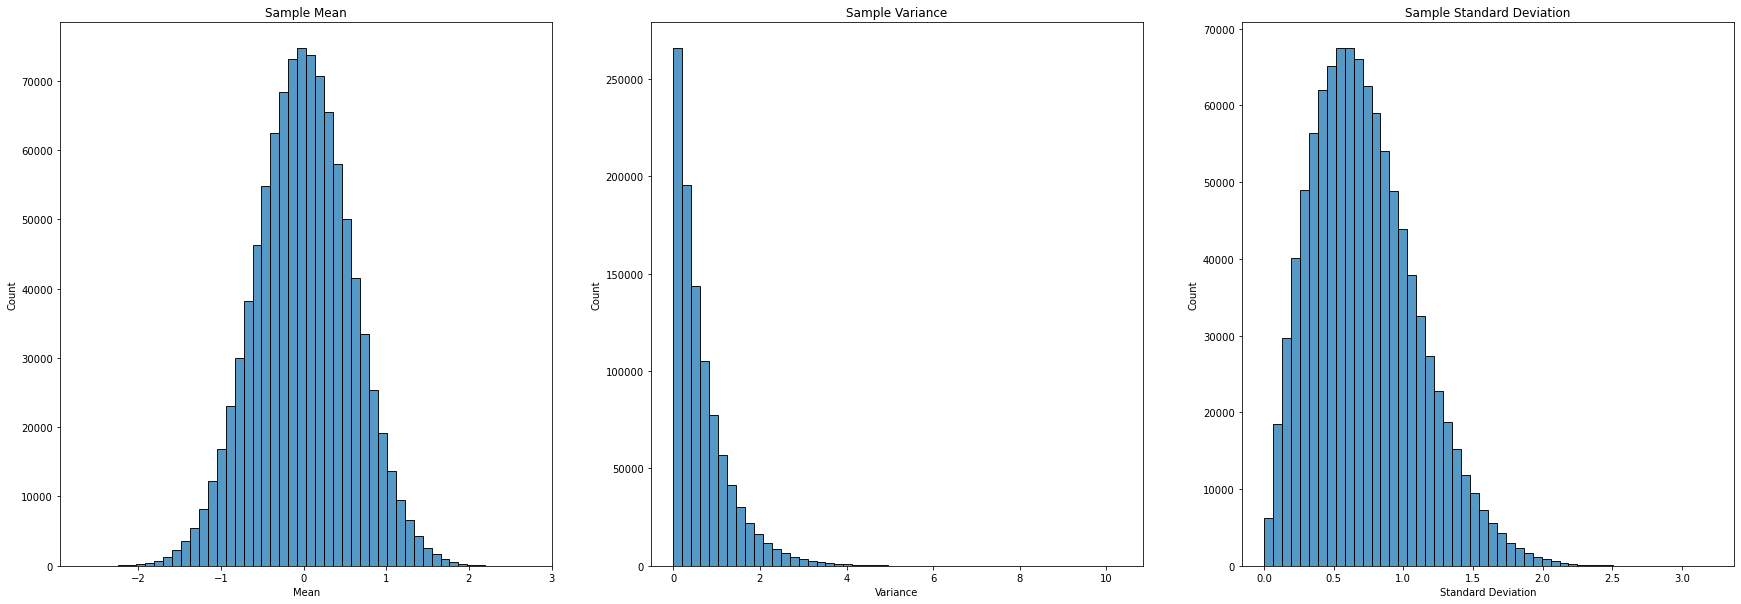

In [23]:
%matplotlib inline
fig, axs = plt.subplots(figsize=(30, 10), ncols=3)
sns.histplot(x=norm_sample_mean_dist, ax=axs[0], bins=50)
axs[0].set_title('Sample Mean')
axs[0].set_xlabel('Mean')
sns.histplot(x=norm_sample_var_dist, ax=axs[1], bins=50)
axs[1].set_title('Sample Variance')
axs[1].set_xlabel('Variance');
sns.histplot(x=norm_sample_std_dist, ax=axs[2], bins=50)
axs[2].set_title('Sample Standard Deviation')
axs[2].set_xlabel('Standard Deviation');


In [24]:
expected_norm_sample_var = np.mean(norm_sample_var_dist)
expected_norm_sample_var

0.6668916355802664

#### Even while using normal distribution we can see that the oberservations made using samples containing discrete values hold true:
* $\sigma^2$ - $E[S^2]$ > 0
* $E[S^2]$ < $\sigma^2$ 

### Now, lets play with two value:
* $n$ = sample size
* $\mu$ = population mean

We will plot a graph for each $v/s$ $E(S^2)$
<br>
and compare with $\sigma^2$

### For $n$:
* $\mu$ = 0
* $\sigma$ = 1

In [25]:
import pandas as pd

In [26]:
variable_n = np.arange(1, 50+1)
variable_n

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [27]:
variable_n_expected_var_series = pd.Series(index=variable_n)

In [28]:
for n in variable_n:
    variable_n_samples = np.random.normal(size=(10**6, n))
    variable_n_var_dist = np.var(variable_n_samples, axis=1)
    variable_n_expected_var_series[n] = np.mean(variable_n_var_dist)

variable_n_expected_var_series.iloc[:5]

1    0.000000
2    0.500396
3    0.667416
4    0.748954
5    0.801532
dtype: float64

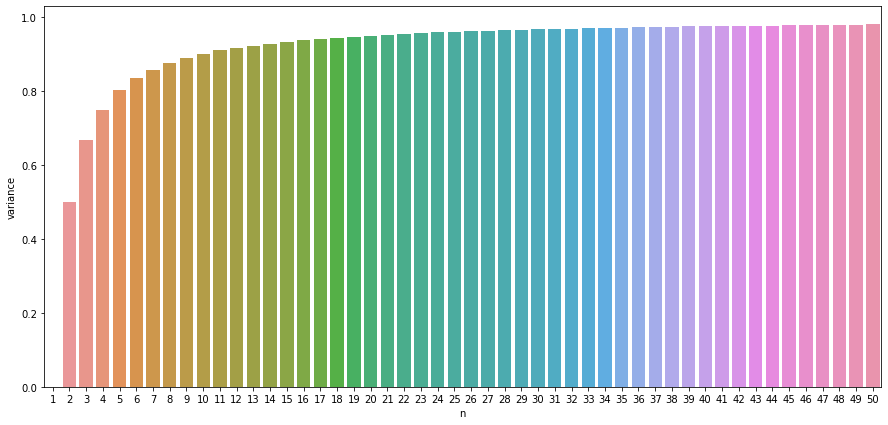

In [29]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.barplot(x=variable_n, y=variable_n_expected_var_series.values)
plt.xlabel('n')
plt.ylabel('variance');

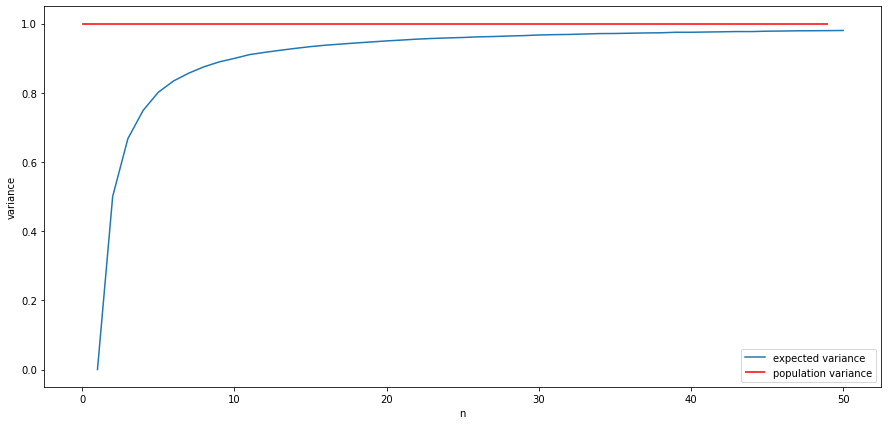

In [30]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.lineplot(x=variable_n, y=variable_n_expected_var_series.values, label='expected variance')
plt.hlines(xmin=0, xmax=49, y=1.0, colors='red', label='population variance')
plt.xlabel('n')
plt.ylabel('variance')
plt.legend(loc='lower right');

We can see that as we increase $n$, $E(S^2)$ is getting closer to $\sigma^2$ which is equal to 1. (but still $<$ $\sigma^2$)

### For $\mu$:
* $n$ = 3
* $\sigma$ = 1

In [31]:
n = 3

In [32]:
variable_mean = np.random.uniform(-10, 10+1, size=50)
variable_mean

array([ 4.40939241, -3.09223648,  0.3988435 ,  3.74857341, -9.49674772,
       -1.47715646, -9.94190206, -3.3961612 , -8.29312695,  0.92642248,
       -8.31590163, -8.67503479, -8.877009  , -2.07597078,  8.55506665,
       -2.21792456,  8.45956277, -1.40873552,  6.1222765 , -3.05652045,
       -6.71883088,  5.69921391, 10.11634185,  4.54634561, -1.86172735,
       -7.05279678, -7.50892009,  3.37189385,  6.14367547,  1.63480028,
        6.76476457,  7.61635525,  1.66904836,  2.35008824,  7.04218584,
        9.41672732, -5.92521675,  9.92195544,  9.0670416 ,  7.29416395,
       -2.98316768, 10.91255518, -3.37444325, -6.91553162,  7.9363998 ,
        5.98558277, -8.55954074, 10.90563604,  1.90626558, -4.80038706])

In [33]:
variable_mean_expected_var_series = pd.Series(index=variable_mean)

In [34]:
for mean in variable_mean:
    variable_mean_samples = np.random.normal(loc=mean, size=(10**6, n))
    variable_mean_var_dist = np.var(variable_mean_samples, axis=1)
    variable_mean_expected_var_series[mean] = np.mean(variable_mean_var_dist)

variable_mean_expected_var_series.iloc[:5]

 4.409392    0.665848
-3.092236    0.666050
 0.398844    0.666562
 3.748573    0.667266
-9.496748    0.668344
dtype: float64

(0.5, 0.7)

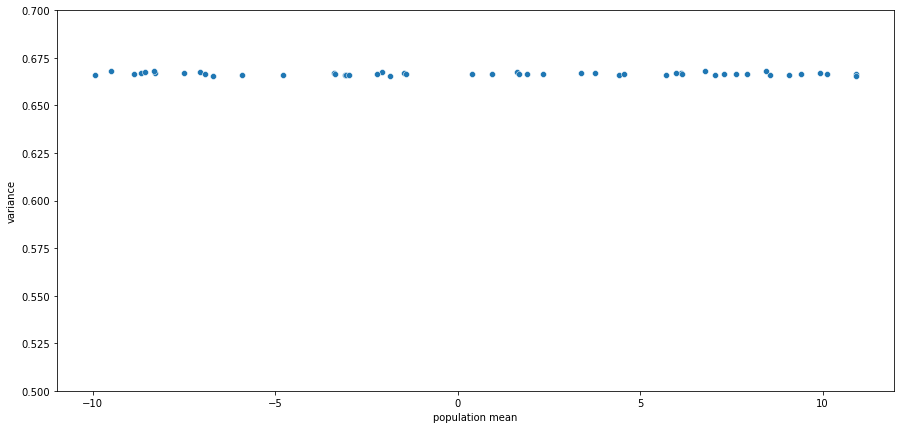

In [35]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.scatterplot(x=variable_mean, y=variable_mean_expected_var_series.values)
plt.xlabel('population mean')
plt.ylabel('variance');
plt.ylim((0.5, 0.7))

The scatterplot for all  $\mu$ is showing approx. 1, so $\mu$ does not affect $E(S^2)$.
<br>
Let's zoom in on the data using lineplot.

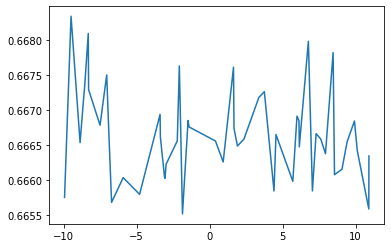

In [36]:
sns.lineplot(x=variable_mean, y=variable_mean_expected_var_series.values);

We can see from the lineplot that value of $E(S^2)$ lies in the interval $(0.679, 0.681)$, which is very very close to 1.


### Conclusions from above two plots:

* As $n$ &#8594 $\infty$ $,$ $E(S^2)$ &#8594; 1
* $\mu$ has no effect on $E(S^2)$

### Also the two observations given below from the previous experiments stand true:
* $\sigma^2$ - $E[S^2]$ > 0
* $E[S^2]$ < $\sigma^2$   $(This$ $one$ $is$ $particularly$ $important)$

## NOW, what if I told you that the variance we have been using till now contains bias!!

You heard it right, and the reason $E(S^2)$ is under-estimating (always having lower value than) $\sigma^2$ is that ***bias***. 

Let's look at the reason, we will look at two reasons:
* Geometric reasoning
* Algebraic reasoning

### Geometric reasoning:


$E[S^2]$ = $E[\frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n}]$ <br><br>
$\sigma^2$ = $E[\frac{\sum_{i=1}^n (X_i - \mu)^2}{n}]$

Now, let's look at few examples:

### Example-1:<br><br>
We have population of containing $6$ numbers - 1, 2, 3, 4, 5, 6.<br> Now, we take a sample containing $3$ numbers - 1, 3, 4
<br><br> $\mu$ and $\bar{X}$ have been shown in the figure below.

<img src="../images/eg1.png"></img>

Now, let's recall the formulas of $\mu$ and $E[S^2]$.
* $\sigma$ is calculated by taking into account the distance between $X_i$ and $\mu$.
* $E[S^2]$ is calculated by taking into account the distance between $X_i$ and $\bar{X}$.

From the above given figure we can see that:
 * $\sum_{i=1}^n (X_i - \mu)$ will be greater than $\sum_{i=1}^n (X_i - \bar{X})$, this happens because $\mu$ is the population mean. Hence it is calculated<br>by taking into account even the end points of the entire population where as, $\bar{X}$ is only the mean of only the points contained <br>
 in that particular sample.
 <br><br><br>

### Example-2:<br><br>

<img src='../images/eg2.png'></img>

Here, $\bar{X}$ and $\mu$ are approximately the same. Hence, if we calculate $E[S^2]$, then we will see that it is close to $\sigma^2$.
<br><br><br>
Hence, by looking at the two examples, we can say that:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;***Average distance of samples from $\bar{X}$ $\le$ Average distance of samples from $\mu$***
<br><br><br>
